In [1]:
#import neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



In [2]:
#read the dataset
train_df=pd.read_csv("C:\\Users\\vsris\\Downloads\\student_spending (1).csv")
test_df=pd.read_csv("C:\\Users\\vsris\\Downloads\\student_spending (1).csv")

In [3]:
#to know what are the colums in your dataset
train_df.columns

Index(['Unnamed: 0', 'age', 'gender', 'year_in_school', 'major',
       'monthly_income', 'financial_aid', 'tuition', 'housing', 'food',
       'transportation', 'books_supplies', 'entertainment', 'personal_care',
       'technology', 'health_wellness', 'miscellaneous',
       'preferred_payment_method'],
      dtype='object')

In [4]:
train_df=pd.read_csv('C:\\Users\\vsris\\Downloads\\student_spending (1).csv', index_col=[0])


In [5]:
train_df.columns

Index(['age', 'gender', 'year_in_school', 'major', 'monthly_income',
       'financial_aid', 'tuition', 'housing', 'food', 'transportation',
       'books_supplies', 'entertainment', 'personal_care', 'technology',
       'health_wellness', 'miscellaneous', 'preferred_payment_method'],
      dtype='object')

In [6]:
#Top 5 rows in your dataset
train_df.head()

,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card
1,24,Female,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card
2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash
3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App
4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card


In [7]:
#bottom 5 rows in your dataset
train_df.tail()

,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
995,22,Female,Senior,Biology,1346,520,3688,969,152,194,151,42,38,252,65,163,Cash
996,19,Female,Senior,Biology,1407,560,3380,508,265,52,206,40,98,274,84,135,Mobile Payment App
997,20,Male,Junior,Economics,957,393,3497,723,339,139,69,112,46,284,57,28,Mobile Payment App
998,22,Non-binary,Senior,Economics,1174,612,3649,543,237,123,200,129,90,190,101,65,Mobile Payment App
999,24,Non-binary,Sophomore,Computer Science,541,640,5965,609,270,191,215,139,43,281,88,145,Cash


In [8]:
train_df.head(10)

,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card
1,24,Female,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card
2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash
3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App
4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card
5,25,Non-binary,Sophomore,Computer Science,523,790,3151,413,386,122,131,73,38,234,108,99,Mobile Payment App
6,23,Female,Freshman,Engineering,1354,69,4973,812,398,101,213,21,38,157,117,48,Credit/Debit Card
7,23,Female,Junior,Economics,631,748,3966,571,269,92,251,37,90,152,56,62,Mobile Payment App
8,22,Non-binary,Senior,Computer Science,1402,248,5638,599,354,82,155,123,41,162,172,194,Credit/Debit Card
9,18,Female,Junior,Computer Science,1423,74,3977,626,249,117,123,51,74,243,34,196,Mobile Payment App


In [9]:
#how does the data looks
print(train_df.shape)#total rows x column count
print("/n")
print(train_df.dtypes)#each column datatype

(1000, 17)
/n
age                          int64
gender                      object
year_in_school              object
major                       object
monthly_income               int64
financial_aid                int64
tuition                      int64
housing                      int64
food                         int64
transportation               int64
books_supplies               int64
entertainment                int64
personal_care                int64
technology                   int64
health_wellness              int64
miscellaneous                int64
preferred_payment_method    object
dtype: object


In [10]:
#info gives count and datatype of it
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1000 non-null   int64 
 1   gender                    1000 non-null   object
 2   year_in_school            1000 non-null   object
 3   major                     1000 non-null   object
 4   monthly_income            1000 non-null   int64 
 5   financial_aid             1000 non-null   int64 
 6   tuition                   1000 non-null   int64 
 7   housing                   1000 non-null   int64 
 8   food                      1000 non-null   int64 
 9   transportation            1000 non-null   int64 
 10  books_supplies            1000 non-null   int64 
 11  entertainment             1000 non-null   int64 
 12  personal_care             1000 non-null   int64 
 13  technology                1000 non-null   int64 
 14  health_wellness          

In [11]:
# finding duplicate values in a dataset
train_df.duplicated().sum()

0

In [12]:
#identifiying garbage values
for i in train_df.select_dtypes(include="object").columns:
    print(train_df[i].value_counts())
    print("!!!!"*5)

Male          356
Female        323
Non-binary    321
Name: gender, dtype: int64
!!!!!!!!!!!!!!!!!!!!
Senior       254
Freshman     253
Junior       247
Sophomore    246
Name: year_in_school, dtype: int64
!!!!!!!!!!!!!!!!!!!!
Biology             228
Economics           204
Computer Science    192
Engineering         192
Psychology          184
Name: major, dtype: int64
!!!!!!!!!!!!!!!!!!!!
Mobile Payment App    350
Credit/Debit Card     340
Cash                  310
Name: preferred_payment_method, dtype: int64
!!!!!!!!!!!!!!!!!!!!


In [13]:
#EXPLORATARY DATA ANALYSIS(EDA)
#describe function used to find the total count,mean,standard deviation ,maximum value,minimum value
#25,50,75 persentage of the dataset value
train_df.describe()

,age,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,21.675000,1020.650000,504.771000,4520.395000,696.00600,252.642000,124.63700,174.761000,84.814000,60.699000,178.304000,114.310000,108.910000
std,2.322664,293.841161,287.092575,860.657944,171.21862,86.949606,43.55799,72.404518,37.970451,22.898007,71.744441,49.591544,52.412221
min,18.000000,501.000000,0.000000,3003.000000,401.00000,100.000000,50.00000,50.000000,20.000000,20.000000,50.000000,30.000000,20.000000
25%,20.000000,770.750000,261.000000,3779.750000,538.75000,175.000000,88.00000,112.000000,54.000000,41.000000,114.000000,73.000000,63.750000
50%,22.000000,1021.000000,513.000000,4547.500000,704.50000,255.000000,123.00000,175.000000,86.000000,62.000000,178.000000,115.000000,110.000000
75%,24.000000,1288.250000,751.500000,5285.000000,837.25000,330.000000,162.25000,238.000000,116.000000,80.000000,241.000000,158.000000,153.000000
max,25.000000,1500.000000,1000.000000,6000.000000,1000.00000,400.000000,200.00000,300.000000,150.000000,100.000000,300.000000,200.000000,200.000000


In [14]:
train_df.describe(include="object")

,gender,year_in_school,major,preferred_payment_method
count,1000,1000,1000,1000
unique,3,4,5,3
top,Male,Senior,Biology,Mobile Payment App
freq,356,254,228,350


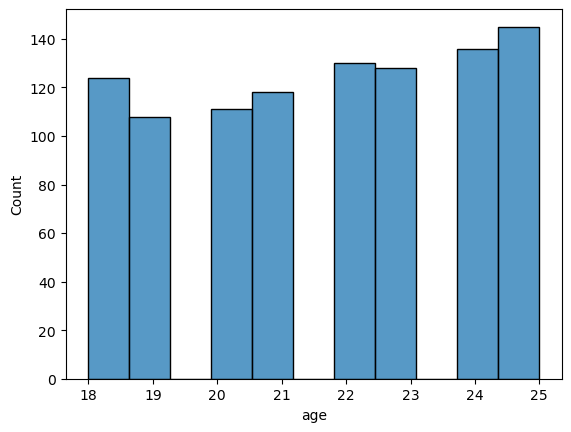

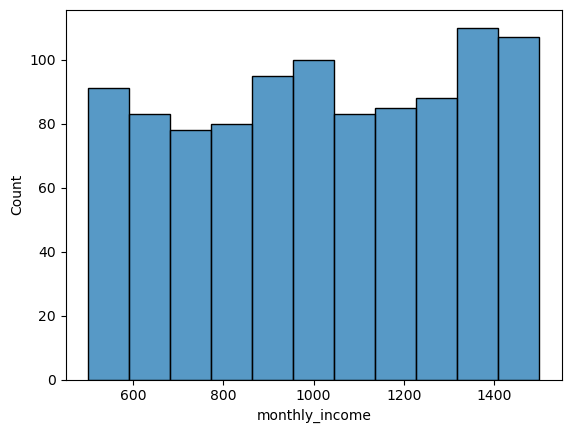

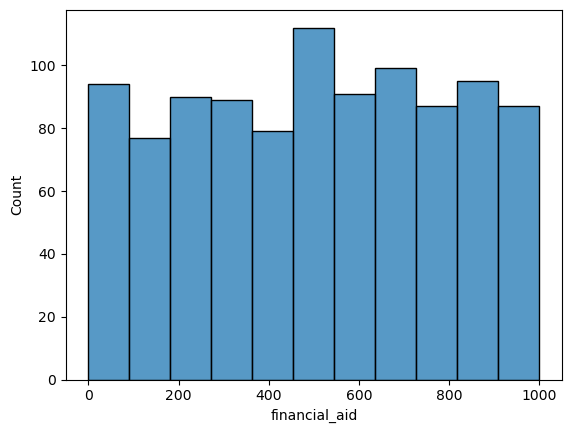

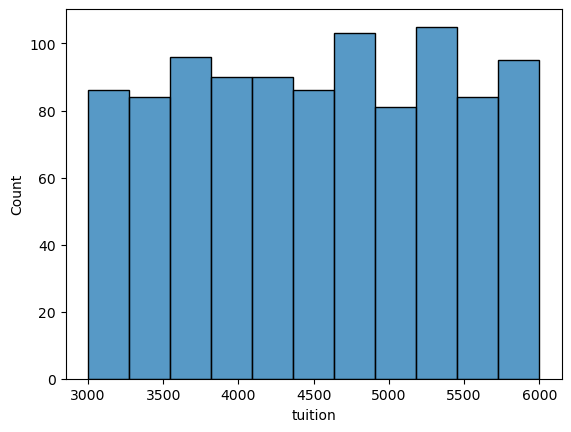

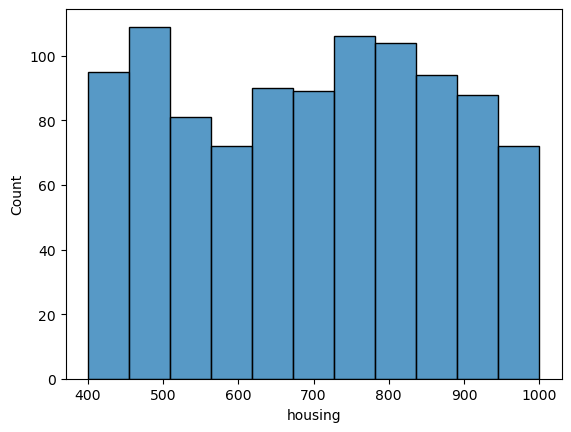

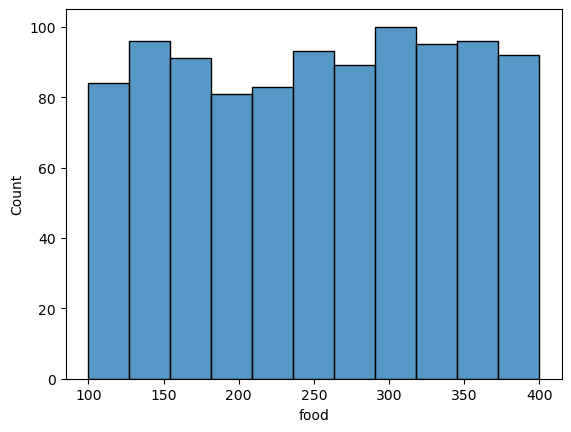

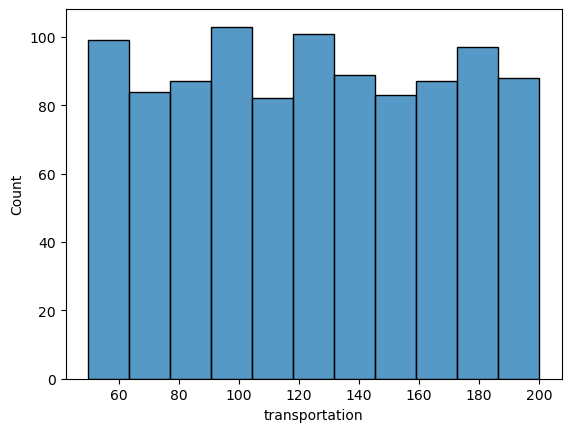

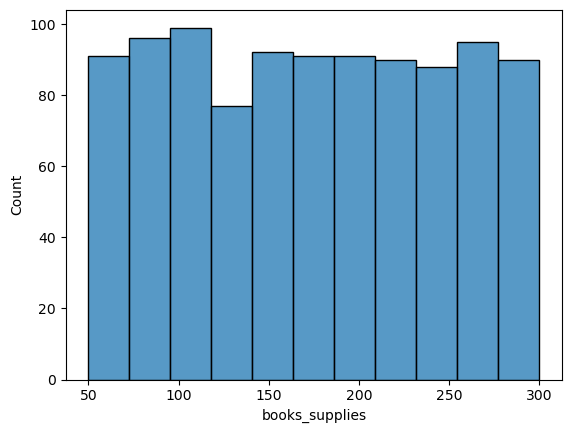

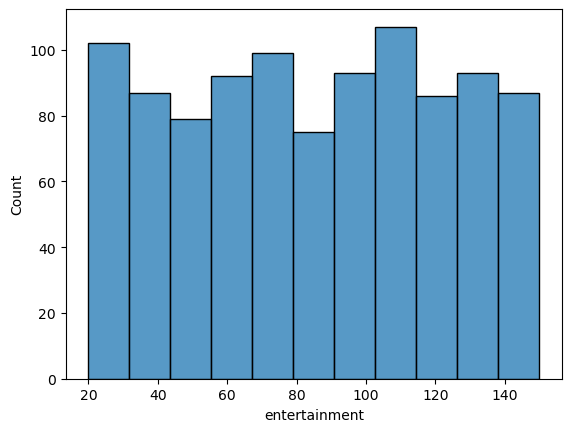

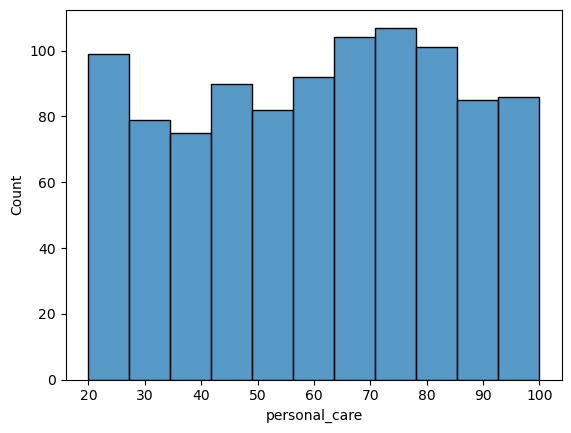

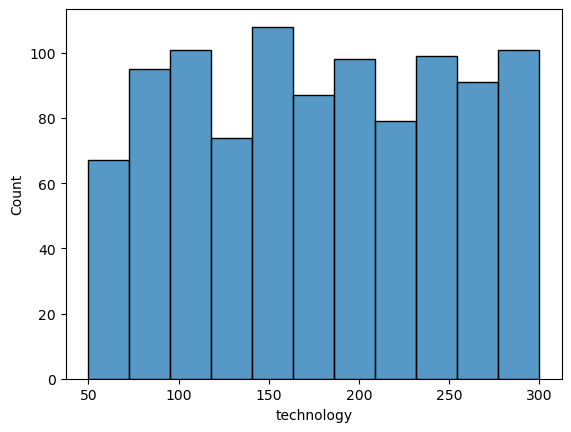

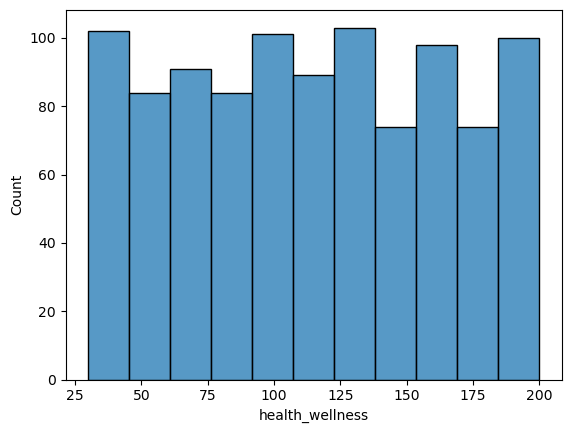

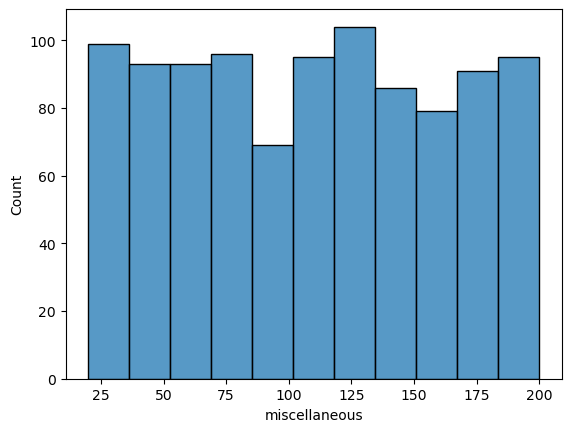

In [15]:
#histogram to understand the distribution
for i in train_df.select_dtypes(include="number").columns:
    sns.histplot(data=train_df,x=i)
    plt.show()

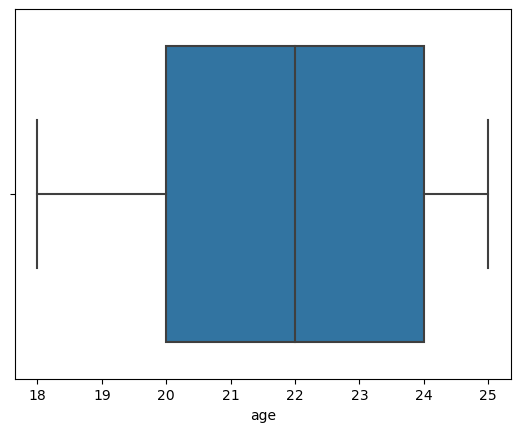

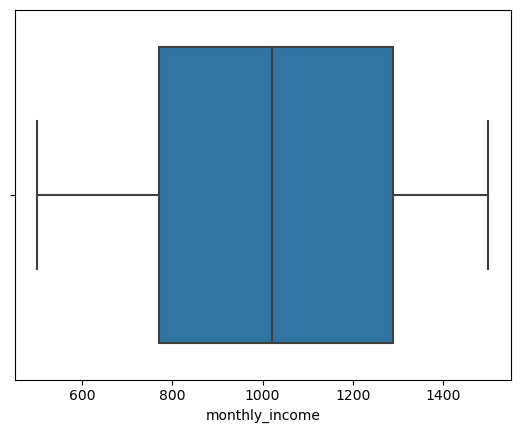

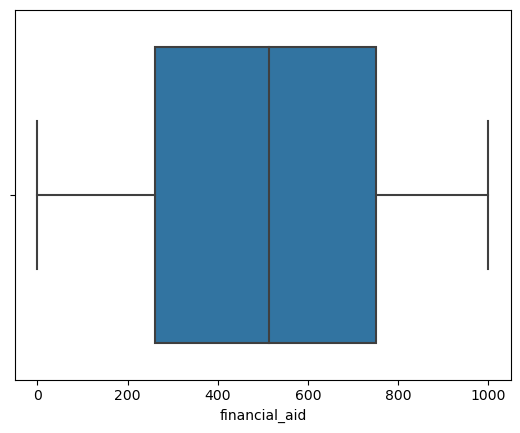

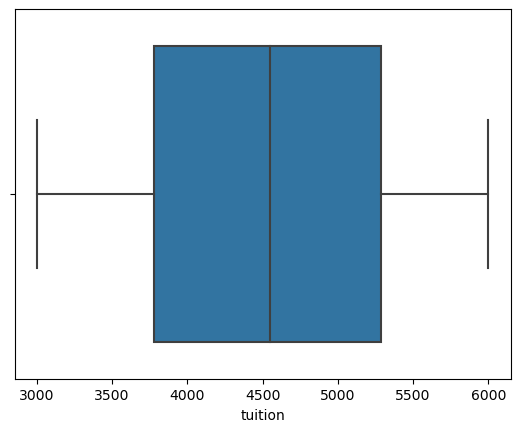

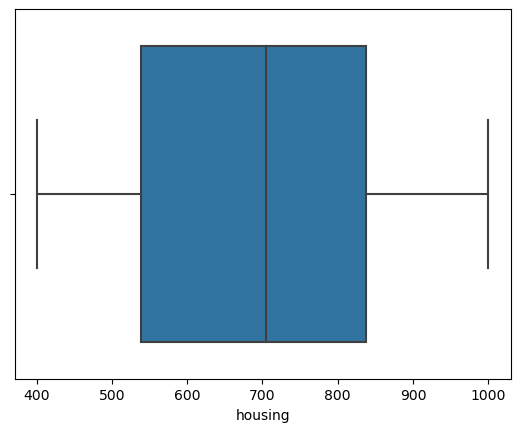

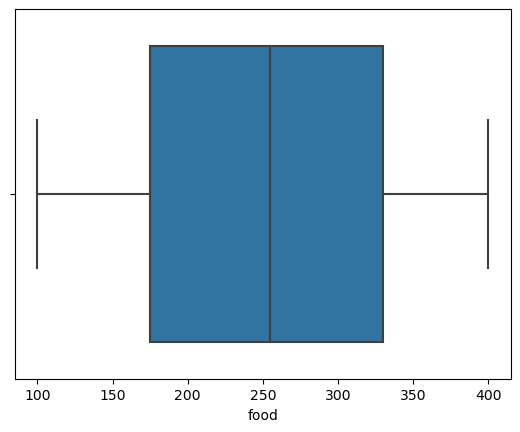

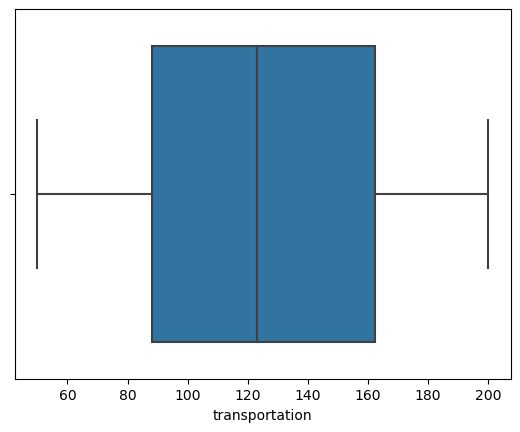

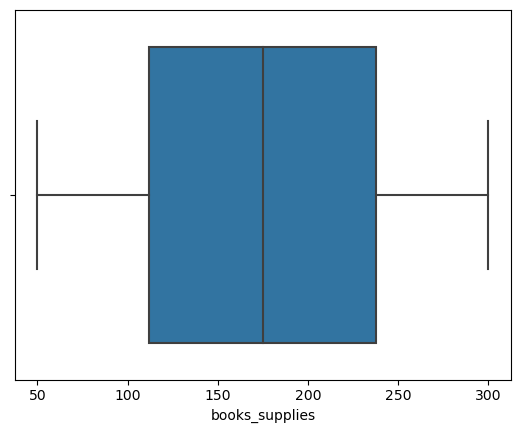

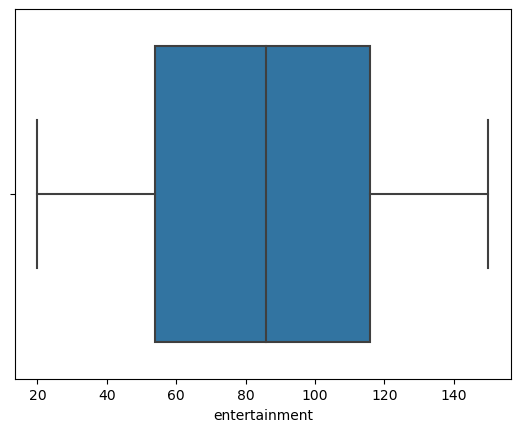

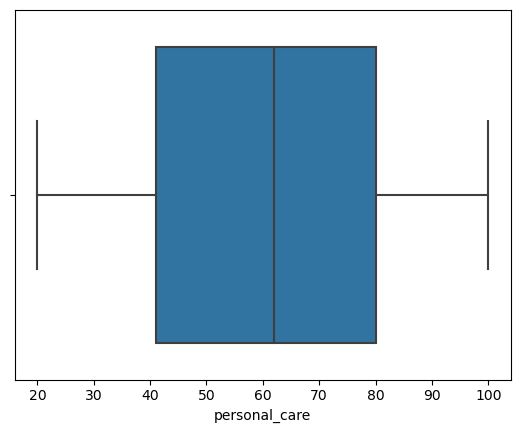

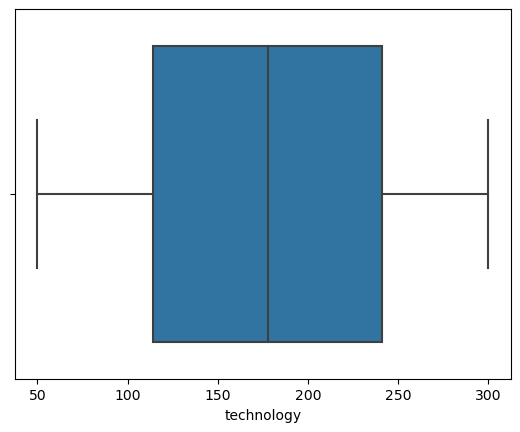

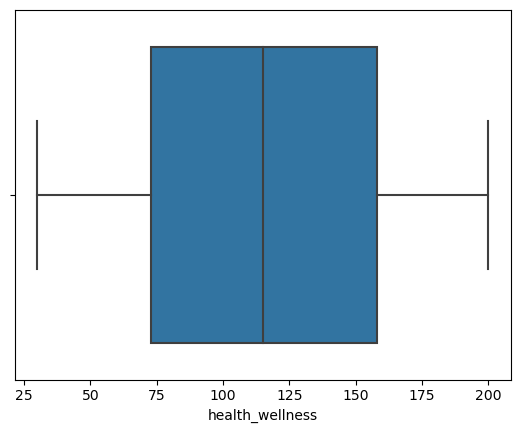

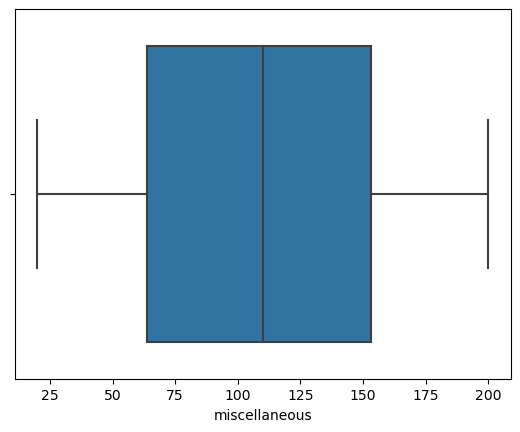

In [16]:
#box plots to identify outliers
for i in train_df.select_dtypes(include="number").columns:
    sns.boxplot(data=train_df,x=i)
    plt.show()


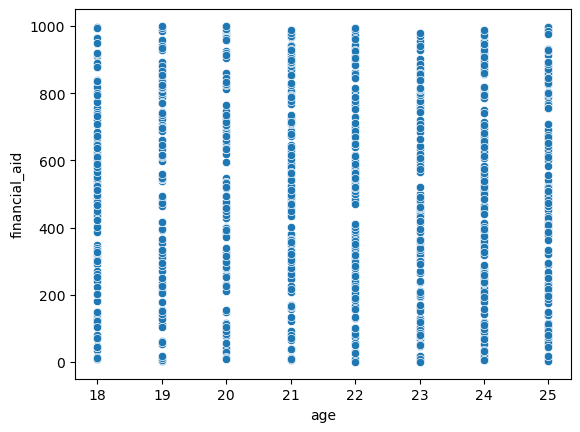

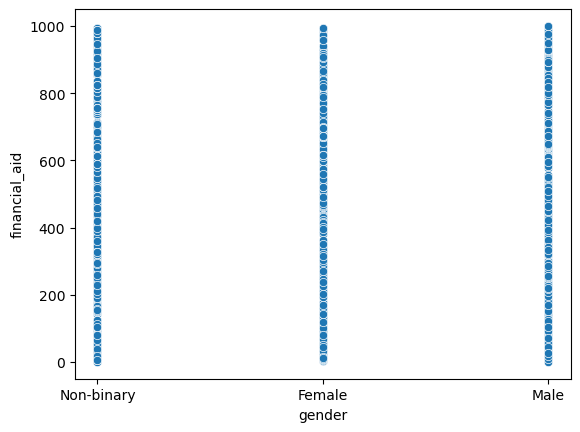

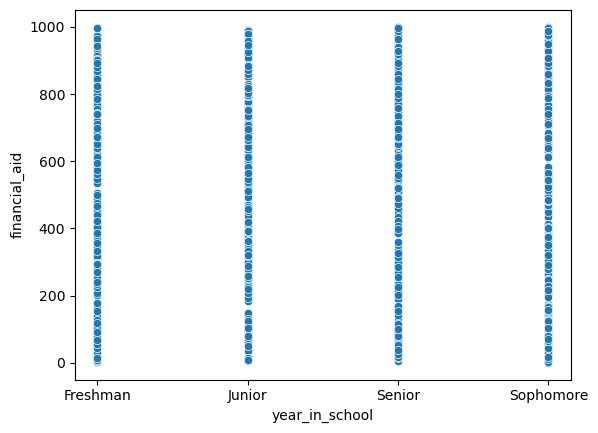

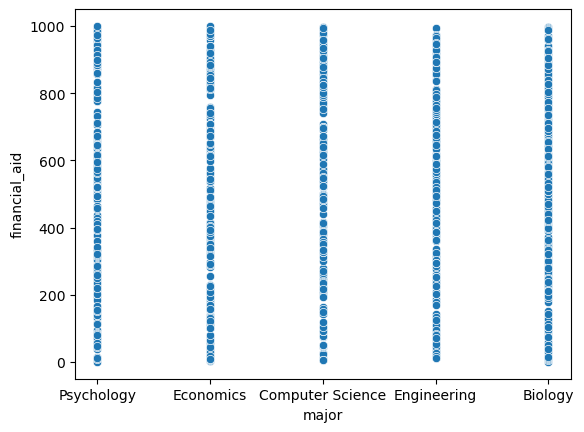

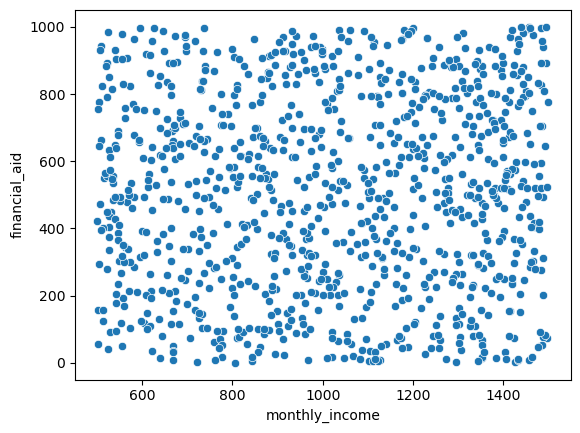

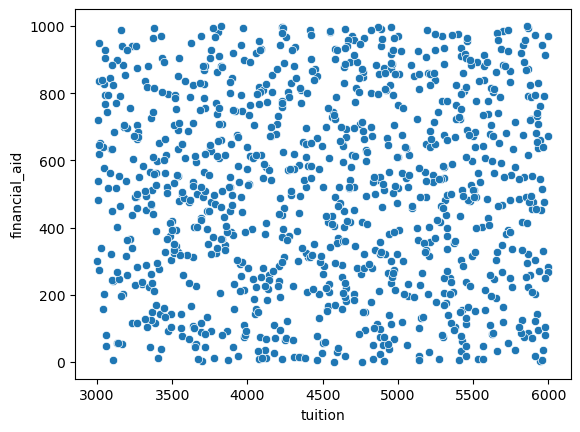

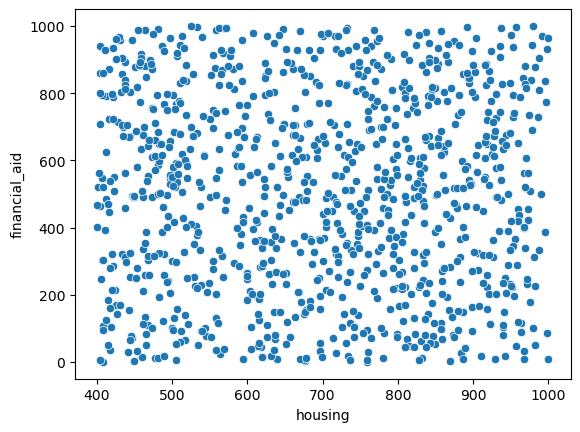

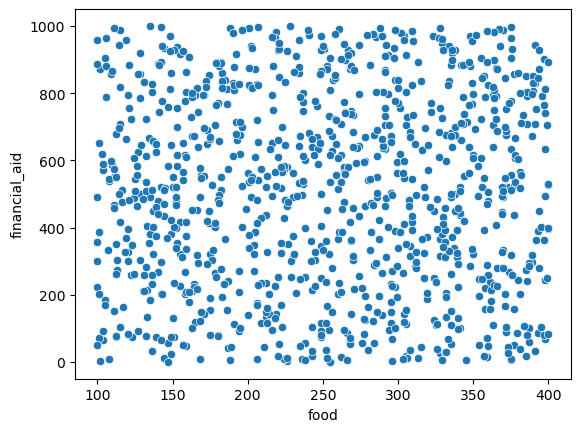

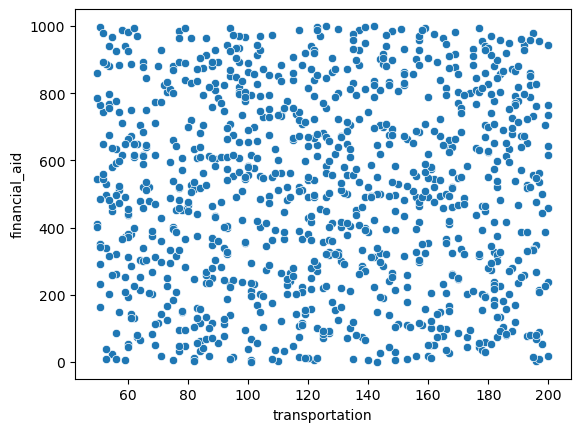

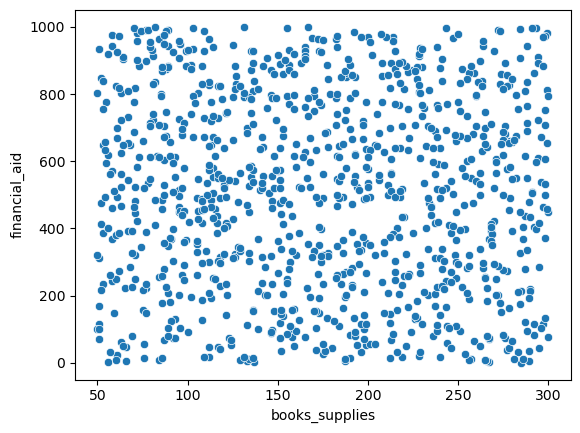

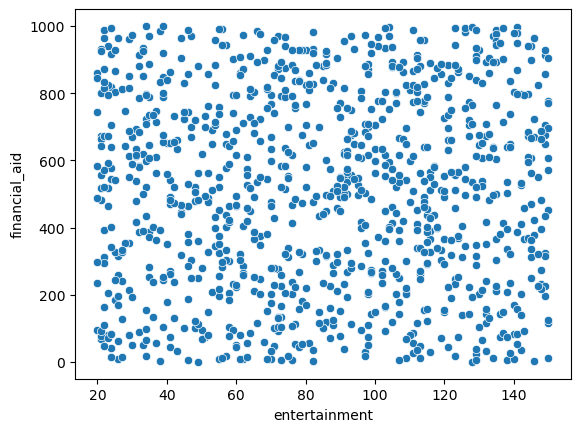

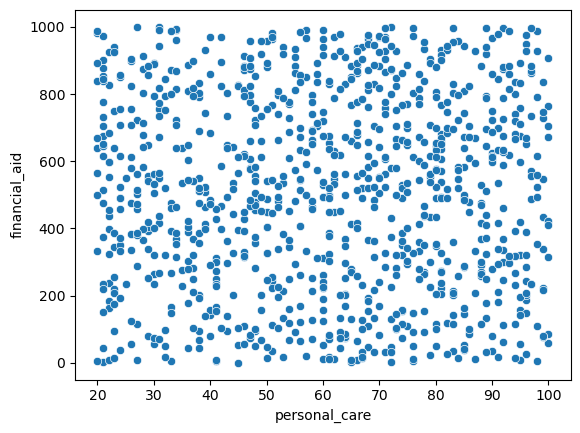

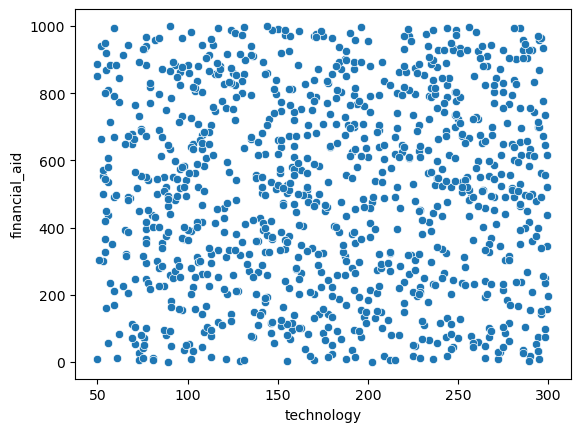

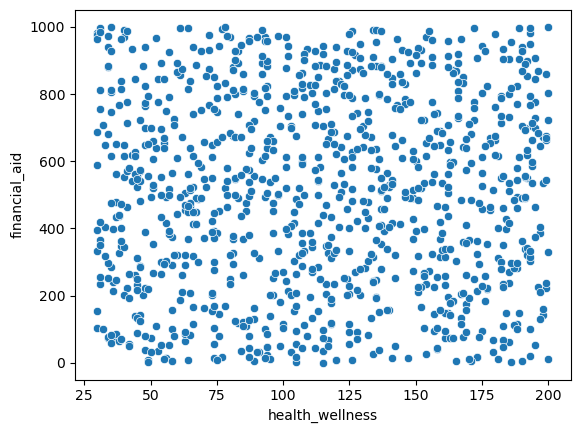

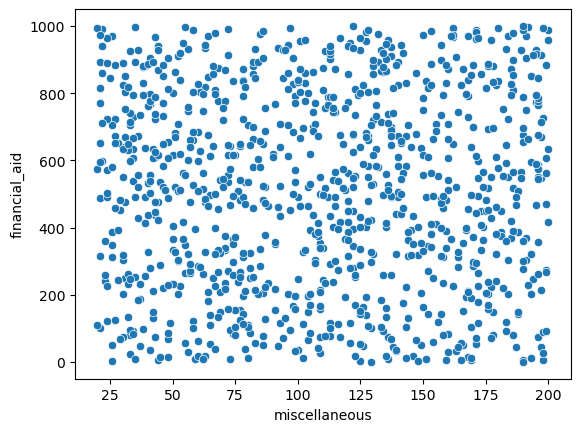

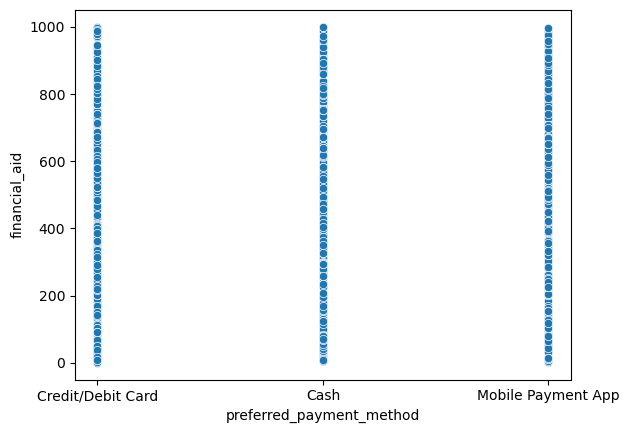

In [17]:
#scatter plot to understand the relationship
for i in ['age', 'gender', 'year_in_school', 'major', 'monthly_income',
       'tuition', 'housing', 'food', 'transportation',
       'books_supplies', 'entertainment', 'personal_care', 'technology',
       'health_wellness', 'miscellaneous', 'preferred_payment_method']:
    sns.scatterplot(data=train_df,x=i,y='financial_aid')
    plt.show()

In [18]:
#correlation with heat map to interepret the relation and multicolliniarity
import warnings
warnings.filterwarnings("ignore")
train_df.corr()

,age,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous
age,1.000000,-0.015448,-0.022263,0.037042,0.023288,0.029906,-0.015375,0.025567,0.060446,-0.052414,0.005633,-0.025031,0.003904
monthly_income,-0.015448,1.000000,0.037050,-0.000149,0.004471,-0.018521,0.046152,0.003527,0.024454,0.006842,0.010084,-0.032567,-0.023902
financial_aid,-0.022263,0.037050,1.000000,0.008536,-0.008199,0.017463,0.017674,-0.048570,0.014249,-0.010427,0.017912,0.024430,-0.002977
tuition,0.037042,-0.000149,0.008536,1.000000,-0.020992,-0.019216,0.036734,-0.009433,-0.036925,-0.039074,-0.007864,0.010978,-0.014844
housing,0.023288,0.004471,-0.008199,-0.020992,1.000000,-0.038335,-0.001975,-0.009936,0.021142,0.014577,-0.017230,-0.006323,0.013337
food,0.029906,-0.018521,0.017463,-0.019216,-0.038335,1.000000,-0.003443,0.075485,0.012960,0.047422,0.034033,-0.003700,0.005192
transportation,-0.015375,0.046152,0.017674,0.036734,-0.001975,-0.003443,1.000000,0.012900,0.008505,0.048892,-0.003910,0.024824,0.032136
books_supplies,0.025567,0.003527,-0.048570,-0.009433,-0.009936,0.075485,0.012900,1.000000,0.004742,-0.037669,0.019464,0.000030,-0.001294
entertainment,0.060446,0.024454,0.014249,-0.036925,0.021142,0.012960,0.008505,0.004742,1.000000,-0.023282,0.012152,-0.032671,-0.019109
personal_care,-0.052414,0.006842,-0.010427,-0.039074,0.014577,0.047422,0.048892,-0.037669,-0.023282,1.000000,0.050225,0.004207,-0.014038


In [19]:

a=train_df.corr()

<Axes: >

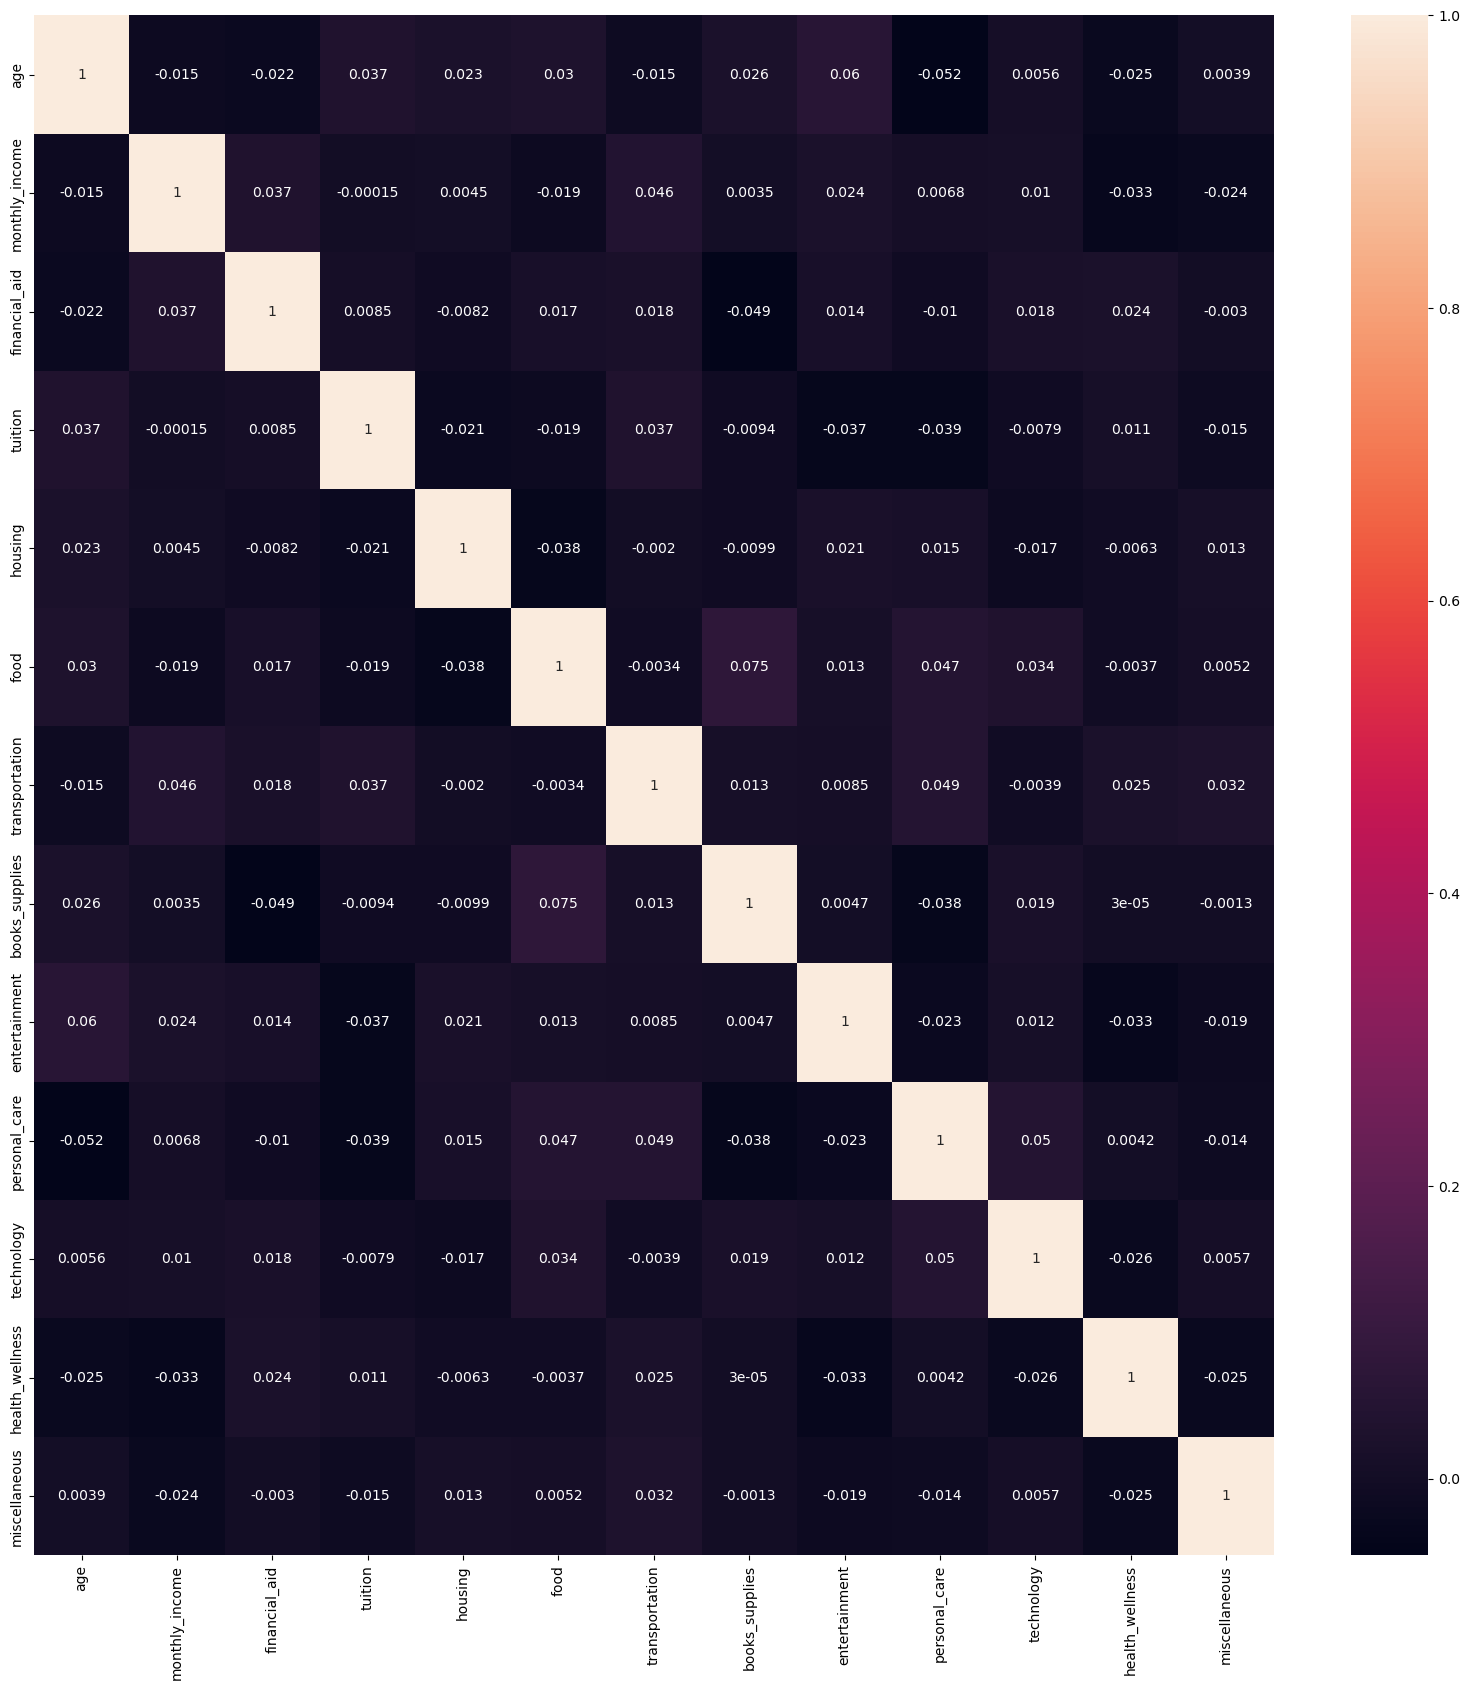

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(a,annot=True)

In [21]:
#choose the method of imputing missing value
#like mean,median,mode or KNNIputer
train_df.isnull().sum()#there is no null values in this dataset 

age                         0
gender                      0
year_in_school              0
major                       0
monthly_income              0
financial_aid               0
tuition                     0
housing                     0
food                        0
transportation              0
books_supplies              0
entertainment               0
personal_care               0
technology                  0
health_wellness             0
miscellaneous               0
preferred_payment_method    0
dtype: int64

In [22]:
train_df=train_df.drop(['age','year_in_school','major','preferred_payment_method'],axis=1)
train_df.head()

,gender,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous
0,Non-binary,958,270,5939,709,296,123,188,41,78,134,127,72
1,Female,1006,875,4908,557,365,85,252,74,92,226,129,68
2,Non-binary,734,928,3051,666,220,137,99,130,23,239,112,133
3,Female,617,265,4935,652,289,114,223,99,30,163,105,55
4,Female,810,522,3887,825,372,168,194,48,71,88,71,104


In [23]:
def removecountryoutlier(value):
    if value not in ['female', 'male']:
        return '0'
    else:
        return '1'

train_df['gender'] = train_df['gender'].apply(removecountryoutlier)
train_df['gender'].value_counts()


0    1000
Name: gender, dtype: int64

In [24]:
train_df.head(10)

,gender,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous
0,0,958,270,5939,709,296,123,188,41,78,134,127,72
1,0,1006,875,4908,557,365,85,252,74,92,226,129,68
2,0,734,928,3051,666,220,137,99,130,23,239,112,133
3,0,617,265,4935,652,289,114,223,99,30,163,105,55
4,0,810,522,3887,825,372,168,194,48,71,88,71,104
5,0,523,790,3151,413,386,122,131,73,38,234,108,99
6,0,1354,69,4973,812,398,101,213,21,38,157,117,48
7,0,631,748,3966,571,269,92,251,37,90,152,56,62
8,0,1402,248,5638,599,354,82,155,123,41,162,172,194
9,0,1423,74,3977,626,249,117,123,51,74,243,34,196


In [25]:
x = train_df.drop('financial_aid',axis=1)
y= train_df['financial_aid']

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [27]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
predictions=lr.predict(x_test)

In [28]:
lir=LinearRegression()
lir.fit(x_train,y_train)

LinearRegression()

In [29]:
y_predict=lir.predict(x_test)
print(y_predict)
print(y_test)

[490.56597698 484.3305174  517.04613799 467.00126694 529.64227894
 509.57340058 484.4818791  551.17223957 488.92251798 531.50276926
 487.66010435 493.85963485 457.3361112  473.77593566 485.39208785
 506.70294604 448.90109009 531.67824156 488.54523641 541.11079991
 502.18589779 506.16281726 445.0913409  487.30651859 471.92335006
 453.24988419 477.26357151 517.41919947 507.72942459 496.31248001
 527.24085171 489.79401944 471.67777267 498.68793781 497.99768803
 488.25053433 464.55046077 478.58518853 507.40402837 464.61040573
 508.385537   462.42673903 487.87030968 478.57061277 506.06347584
 521.40495571 532.35427081 517.13033695 517.97149628 491.82965025
 548.00238365 507.73872975 481.54826566 504.62290572 509.99139
 449.47856129 513.56540784 498.70385888 503.69068509 499.212882
 446.37243537 499.6630938  501.52306494 486.57268217 454.05398529
 472.08360295 455.87883452 503.45591768 492.4321253  531.27461488
 534.26120084 499.42753205 492.80586617 511.74755727 525.06033743
 509.27358066 4

In [30]:
print('coefficient of determination: %.3f' % r2_score(y_test,y_predict))

coefficient of determination: -0.025


In [31]:
from sklearn.metrics import r2_score
print(f"R squared:{r2_score(y_test,y_predict)}")

R squared:-0.024748262682853683


In [32]:
diff = y_test - predictions

<Axes: xlabel='financial_aid', ylabel='Density'>

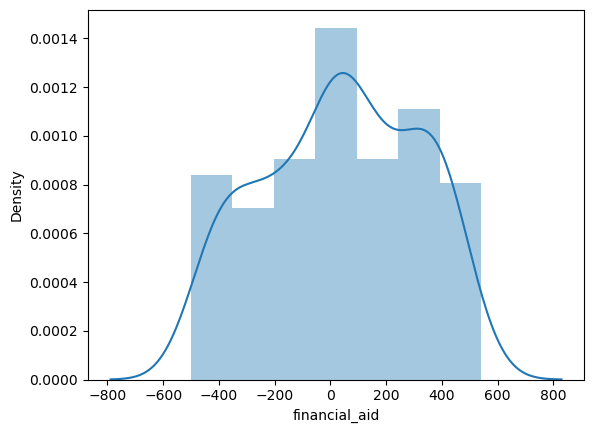

In [33]:
import seaborn as sns
sns.distplot(diff)

In [34]:
import pickle
pickle.dump(lr, open('./predicted.sav', 'wb'))

In [37]:
from joblib import dump
dump(predictions,"regg.pkl")


['regg.pkl']